## 导入各种包与数据；合并23号与24号数据

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from  feature_extract import  Fea_Extra
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import seaborn
import warnings
warnings.filterwarnings("ignore")
from additonal_method import get_startpoint
# 中文字体与图片显示
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(10,5)

data1 = pd.read_csv('data_20221023.csv')
data2 = pd.read_csv('data_20221024.csv')
data = pd.concat([data1,data2])

In [3]:
data

,时间,编号,预压升降位置,预压升降速度,预压升降扭矩,冷压电机位置,冷压电机速度,冷压电机扭矩
0,'2022-10-23 00:00:00:0034,686816,1.788139e-06,0.000397,-4.3,20.00000,0.000040,-2.5
1,'2022-10-23 00:00:00:0153,686816,1.986821e-07,0.000397,-4.3,20.00000,-0.000060,-2.6
2,'2022-10-23 00:00:00:0268,686816,-5.960464e-07,-0.000397,-4.3,20.00000,-0.000020,-2.5
3,'2022-10-23 00:00:00:0506,686816,-1.390775e-06,-0.000199,-4.3,20.00000,0.000000,-2.5
4,'2022-10-23 00:00:00:0620,686816,9.934107e-07,0.000199,-4.4,20.00000,-0.000040,-2.4
...,...,...,...,...,...,...,...,...
6245895,'2022-10-24 23:59:59:9411,696127,4.788825e+01,0.000397,34.9,47.20292,-0.000556,52.0
6245896,'2022-10-24 23:59:59:9525,696127,4.788824e+01,0.000000,34.7,47.20292,-0.000517,52.0
6245897,'2022-10-24 23:59:59:9699,696127,4.788824e+01,-0.000397,34.8,47.20291,-0.000397,52.0
6245898,'2022-10-24 23:59:59:9818,696127,4.788824e+01,-0.000596,34.9,47.20290,-0.000358,52.3


## 获取周期起点与数据周期

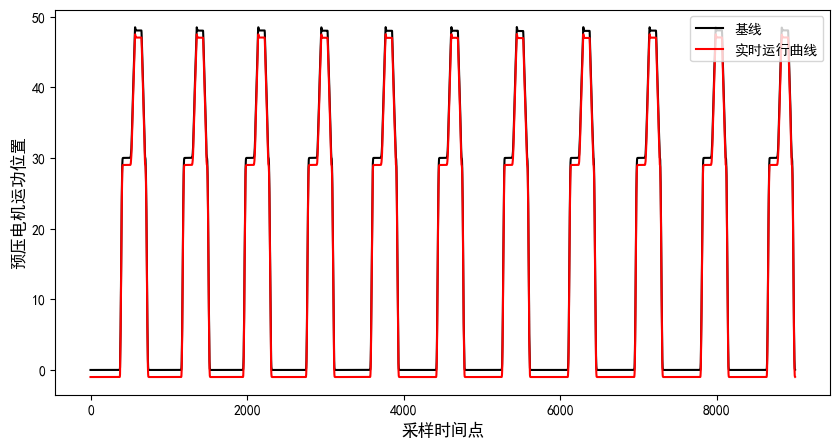

In [11]:
data = data1['预压升降位置'][211000:220000]
test_data = data1['预压升降位置'][211000:220000]-1
l1 = plt.plot(range(len(data)),data,color = 'black',label = '基线')
l2 = plt.plot(range(len(test_data)),test_data,color = 'red',label = '实时运行曲线')
plt.ylabel('预压电机运功位置',size =12)
plt.xlabel('采样时间点',size = 12)
plt.legend(loc = 'upper right')
plt.show()

In [3]:
res = get_startpoint(data1)
res[1]

[Function: get_startpoint start...]
[Function: get_startpoint finished, spent time: 38.32s]


["'2022-10-23 00:07:36:4337",
 array([5.265077e-05, 2.012650e-03, 2.231499e-02, 6.489793e-02,
        1.416703e-01, 3.157344e-01, 5.140684e-01, 7.830817e-01,
        1.133170e+00, 1.574776e+00, 2.119698e+00, 3.011774e+00,
        3.793722e+00, 4.664413e+00, 5.943288e+00, 6.977626e+00,
        8.066153e+00, 9.579764e+00, 1.074729e+01, 1.193239e+01,
        1.312547e+01, 1.432044e+01, 1.551725e+01, 1.751407e+01,
        1.870787e+01, 1.988872e+01, 2.142446e+01, 2.253477e+01,
        2.359528e+01, 2.459712e+01, 2.552800e+01, 2.637829e+01,
        2.736572e+01, 2.779108e+01, 2.834002e+01, 2.891872e+01,
        2.924915e+01, 2.950134e+01, 2.977789e+01, 2.987527e+01,
        2.991813e+01, 2.995778e+01, 2.997697e+01, 2.998628e+01,
        2.999409e+01, 2.999622e+01, 2.999773e+01, 2.999865e+01,
        2.999924e+01, 2.999955e+01, 2.999980e+01, 2.999990e+01,
        2.999996e+01, 2.999999e+01, 3.000002e+01, 3.000003e+01,
        3.000004e+01, 3.000005e+01, 3.000005e+01, 3.000006e+01,
        3.

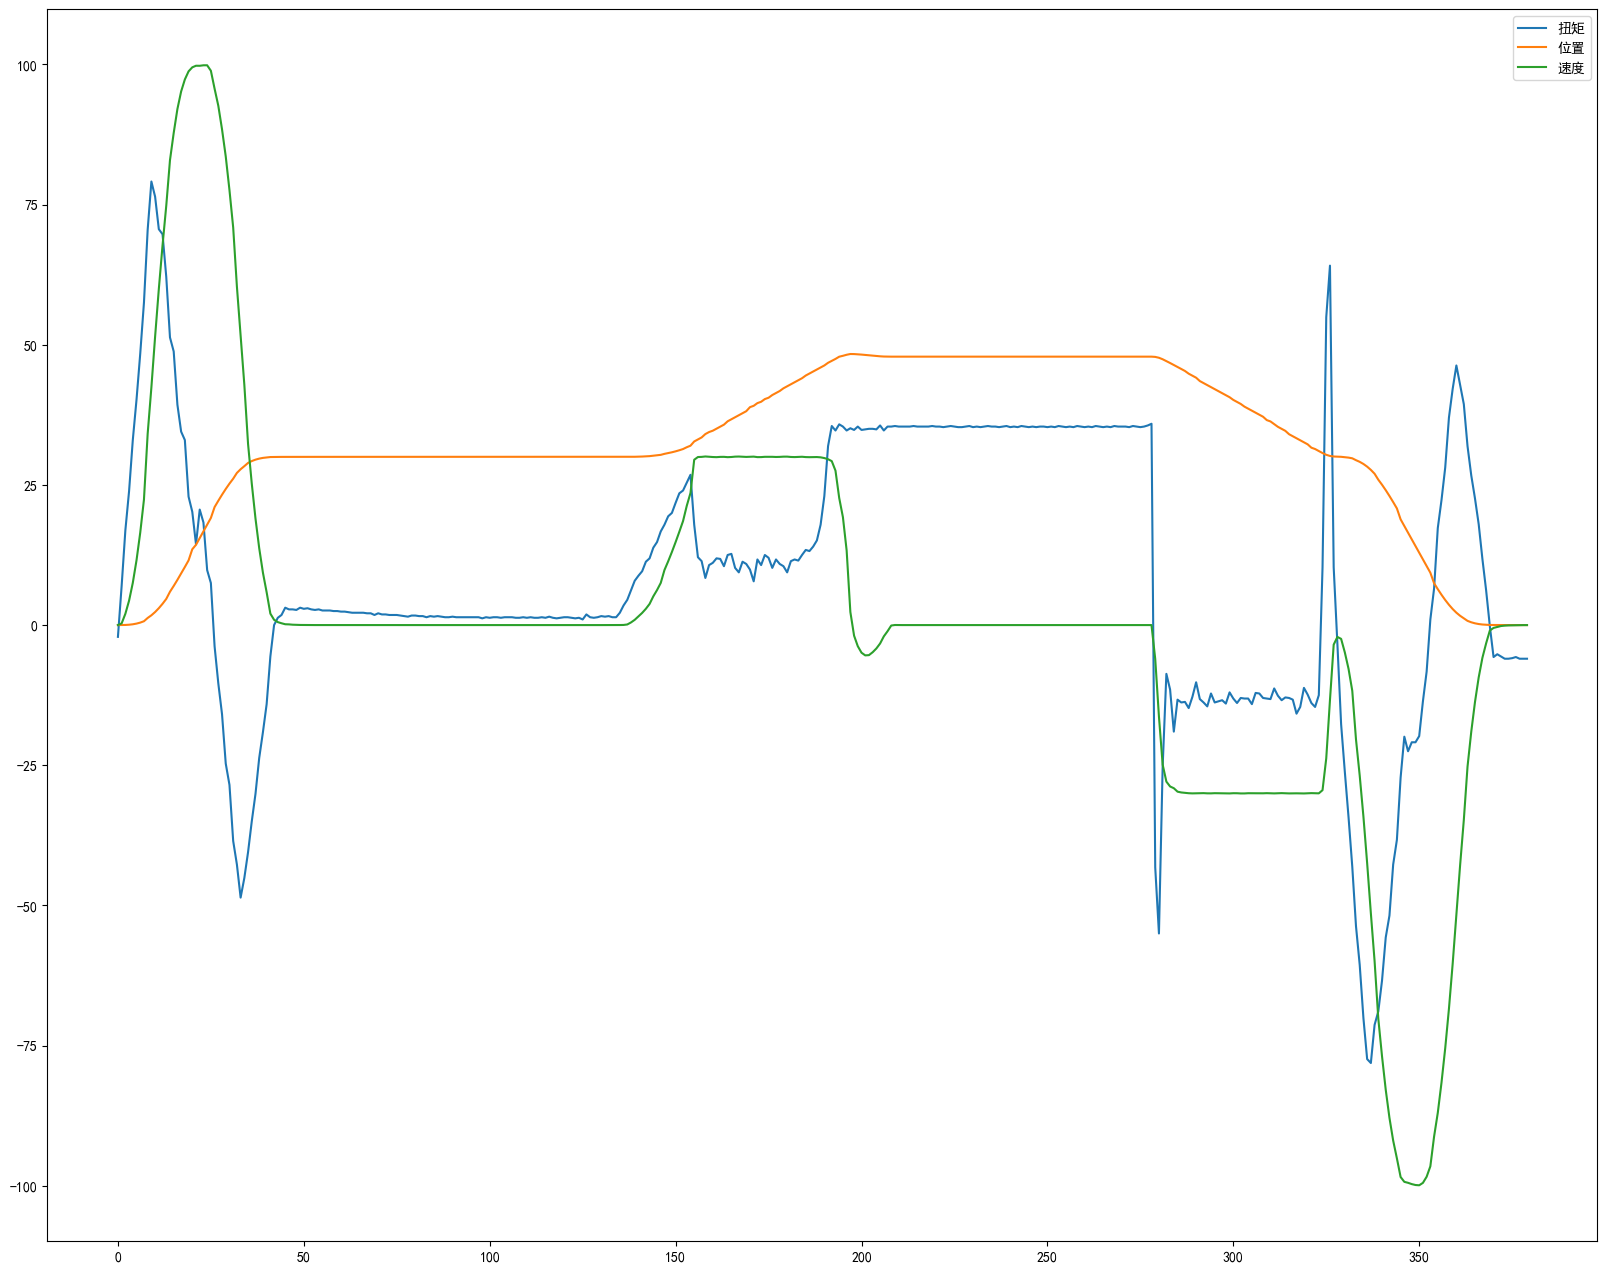

In [68]:
## 随机绘制一个周期图
plt.plot(range(len(res[130][3])),res[130][3])
plt.plot(range(len(res[130][1])),res[130][1])
plt.plot(range(len(res[130][2])),res[130][2])

plt.legend(('扭矩', '位置', '速度'), loc='upper right')

## 特征提取；包括时/频/业务域 特征

In [7]:
#提取位置/速度/转矩全部的特征信息
result = []
for i in range(len(res)):
    rest = []
    for j in range(1,4):
        f = Fea_Extra(res[i][j])
        temp = f.Both_Fea()
        rest.append(temp)
    result.append(list(np.array(rest).flatten()))
# len(result[1])
df = pd.DataFrame(result)
df['code'] = range(len(res))
df['time'] = [i[0] for i in res]
df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,code,time
0,31.827454,14.296210,28.487030,34.883099,24.268473,-0.830469,-0.003129,1.391416,1.703824,1.096007,...,1.293897,3.145364,0.411366,0.928009,2.408405,10.576158,0.734211,0.042105,0,'2022-10-23 00:06:53:0525
1,33.049382,13.660633,30.313998,35.754488,24.258464,-0.875122,0.234856,1.356948,1.600481,1.081850,...,1.429266,3.319991,0.430503,0.941448,2.175901,8.776318,0.752632,0.044737,1,'2022-10-23 00:07:36:4337
2,33.072883,13.414580,30.504252,35.683231,24.268490,-0.868453,0.280485,1.360220,1.591156,1.078927,...,1.448464,3.438957,0.421193,0.958013,2.262004,9.206457,0.757895,0.044737,2,'2022-10-23 00:08:27:1840
3,32.180520,14.058813,29.022551,35.110055,24.266766,-0.845698,0.093356,1.382327,1.672271,1.091034,...,1.318306,3.184627,0.413959,0.937775,2.390646,10.216953,0.734211,0.034211,3,'2022-10-23 00:08:37:9700
4,31.932441,14.443515,28.424507,35.039220,24.253196,-0.847603,0.006326,1.384344,1.706496,1.097292,...,1.304430,3.151270,0.413938,0.913779,2.401116,10.557545,0.723684,0.031579,4,'2022-10-23 00:09:39:2776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,11.424954,2.027772,11.186684,11.603043,5.932648,-4.768779,21.653394,1.022607,1.060667,1.015588,...,1.485359,3.408487,0.435782,0.678057,2.871384,14.264422,0.971053,0.026316,1150,'2022-10-23 23:57:02:0037
1151,31.849823,14.400026,28.430499,34.946048,24.338458,-0.831090,-0.015928,1.392914,1.712135,1.097213,...,1.290926,3.088237,0.418014,0.913889,2.360885,10.238135,0.734211,0.044737,1151,'2022-10-23 23:58:25:6230
1152,32.228746,14.136198,29.061490,35.185200,24.331154,-0.843736,0.072077,1.383035,1.674462,1.091733,...,1.364800,3.329607,0.409898,0.953057,2.395020,10.184578,0.739474,0.044737,1152,'2022-10-23 23:58:35:9105
1153,32.041925,14.239562,28.738072,35.055906,24.319098,-0.842575,0.052966,1.387446,1.692465,1.094064,...,1.468148,3.404750,0.431206,0.937839,2.187277,8.746364,0.731579,0.036842,1153,'2022-10-23 23:58:46:2248


In [6]:
#提取转矩全部的特征信息
result = []
for i in range(len(res)):
    rest = []
    f = Fea_Extra(res[i][3])
    temp = f.Both_Fea()
    result.append(temp)
# len(result[1])
df = pd.DataFrame(result)
df['code'] = range(len(res))
df['time'] = [i[0] for i in res]
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,code,time
0,8.495000,25.369832,15.948036,26.722643,78.70,-0.452751,0.916697,2.960037,4.959859,1.320340,...,1.293897,3.145364,0.411366,0.928009,2.408405,10.576158,0.734211,0.042105,0,'2022-10-23 00:06:53:0525
1,9.464737,25.475524,16.722977,27.145454,76.85,-0.530627,0.866232,2.847622,4.622383,1.297845,...,1.429266,3.319991,0.430503,0.941448,2.175901,8.776318,0.752632,0.044737,1,'2022-10-23 00:07:36:4337
2,9.535000,25.738129,16.573802,27.415766,78.85,-0.503819,0.873867,2.907086,4.808794,1.308711,...,1.448464,3.438957,0.421193,0.958013,2.262004,9.206457,0.757895,0.044737,2,'2022-10-23 00:08:27:1840
3,8.391842,25.094742,15.833285,26.429375,78.90,-0.468895,0.902255,2.992882,4.995805,1.317395,...,1.318306,3.184627,0.413959,0.937775,2.390646,10.216953,0.734211,0.034211,3,'2022-10-23 00:08:37:9700
4,8.181579,25.068382,15.694887,26.338342,78.00,-0.461777,0.906641,2.984243,5.008000,1.323080,...,1.304430,3.151270,0.413938,0.913779,2.401116,10.557545,0.723684,0.031579,4,'2022-10-23 00:09:39:2776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2.356316,13.884563,2.650717,14.065063,75.30,0.666018,19.166711,5.581205,29.614625,2.972925,...,1.485359,3.408487,0.435782,0.678057,2.871384,14.264422,0.971053,0.026316,1150,'2022-10-23 23:57:02:0037
1151,8.661316,25.010299,15.669901,26.436477,77.75,-0.404199,0.879598,2.946686,4.971314,1.325959,...,1.290926,3.088237,0.418014,0.913889,2.360885,10.238135,0.734211,0.044737,1151,'2022-10-23 23:58:25:6230
1152,8.647105,25.457747,15.897657,26.854493,77.95,-0.460329,0.936513,2.904542,4.906383,1.326579,...,1.364800,3.329607,0.409898,0.953057,2.395020,10.184578,0.739474,0.044737,1152,'2022-10-23 23:58:35:9105
1153,8.233158,24.874889,15.281830,26.170913,77.75,-0.458385,1.050246,2.991871,5.123732,1.335860,...,1.468148,3.404750,0.431206,0.937839,2.187277,8.746364,0.731579,0.036842,1153,'2022-10-23 23:58:46:2248


## 归一化与PCA降维

In [8]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df.iloc[:,:-2])
scaled_data = pd.DataFrame(np_scaled)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(pca_data)
final_data = pd.DataFrame(np_scaled)
final_data

,0,1
0,-0.638046,0.097329
1,-0.649497,-0.120656
2,-0.720027,-0.105817
3,-0.552922,0.104904
4,-0.417347,0.176447
...,...,...
1150,3.778762,18.508234
1151,-0.490154,0.124121
1152,-0.646138,0.037661
1153,-0.380366,0.141206


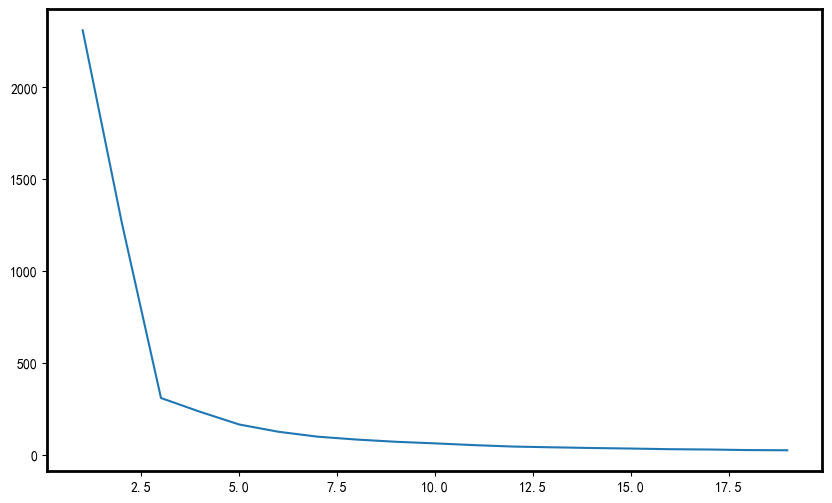

In [9]:
# 迭代计算不同聚类簇数
#拐点位置确定在5簇左右；
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(final_data) for i in n_cluster]
scores = [-kmeans[i].score(final_data) for i in range(len(kmeans))]


fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
###设置坐标轴的粗细
ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2);####设置上部坐标轴的粗细
# plt.figure(figsize=(20,16))
plt.tick_params(labelsize=10)
plt.show()

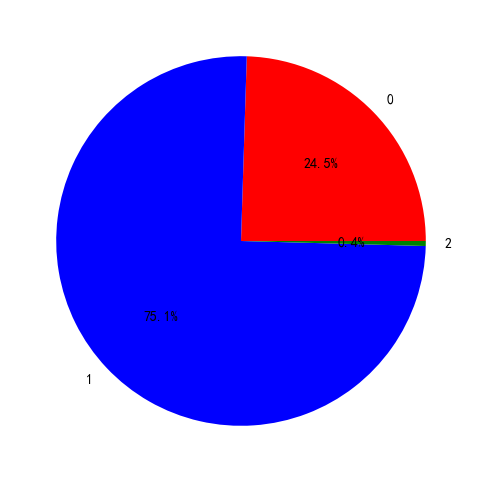

In [11]:
# 这里选择K=5来看看聚类的效果
df['cluster'] = kmeans[2].predict(final_data)
df['principal_feature1'] = final_data[0]
df['principal_feature2'] = final_data[1]
# pd.set_option('display.float_format', '{:.2f}%'.format)
colors = ['red', 'blue', 'green']
kmeans_result = pd.DataFrame(df['cluster'].value_counts(normalize=True,ascending=False)).sort_index()
kmeans_result['cluster'].values

patches,l_text,p_text =plt.pie(kmeans_result['cluster'].values,autopct='%1.1f%%',labels=kmeans_result.index,colors=colors)
for t in l_text:
    t.set_size(10)
for t in p_text:
    t.set_size(10)


# autopct='%1.1f%%'

Text(0, 0.5, '降维特征2')

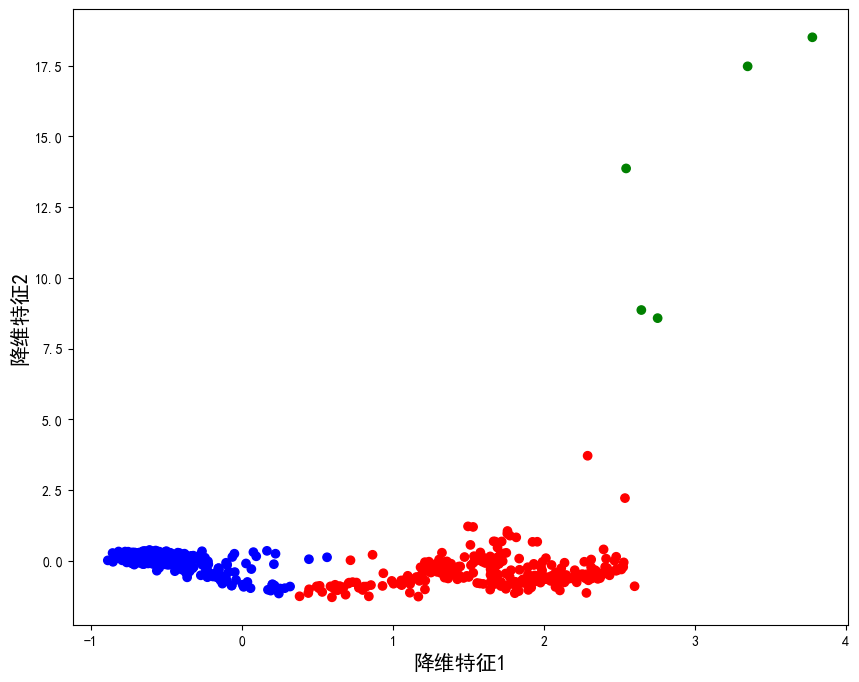

In [12]:
# fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black'}
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.xlabel("降维特征1", fontsize=15,fontweight='bold')
plt.ylabel("降维特征2", fontsize=15,fontweight='bold')
# plt.grid()

0 [368, 879, 651, 452]


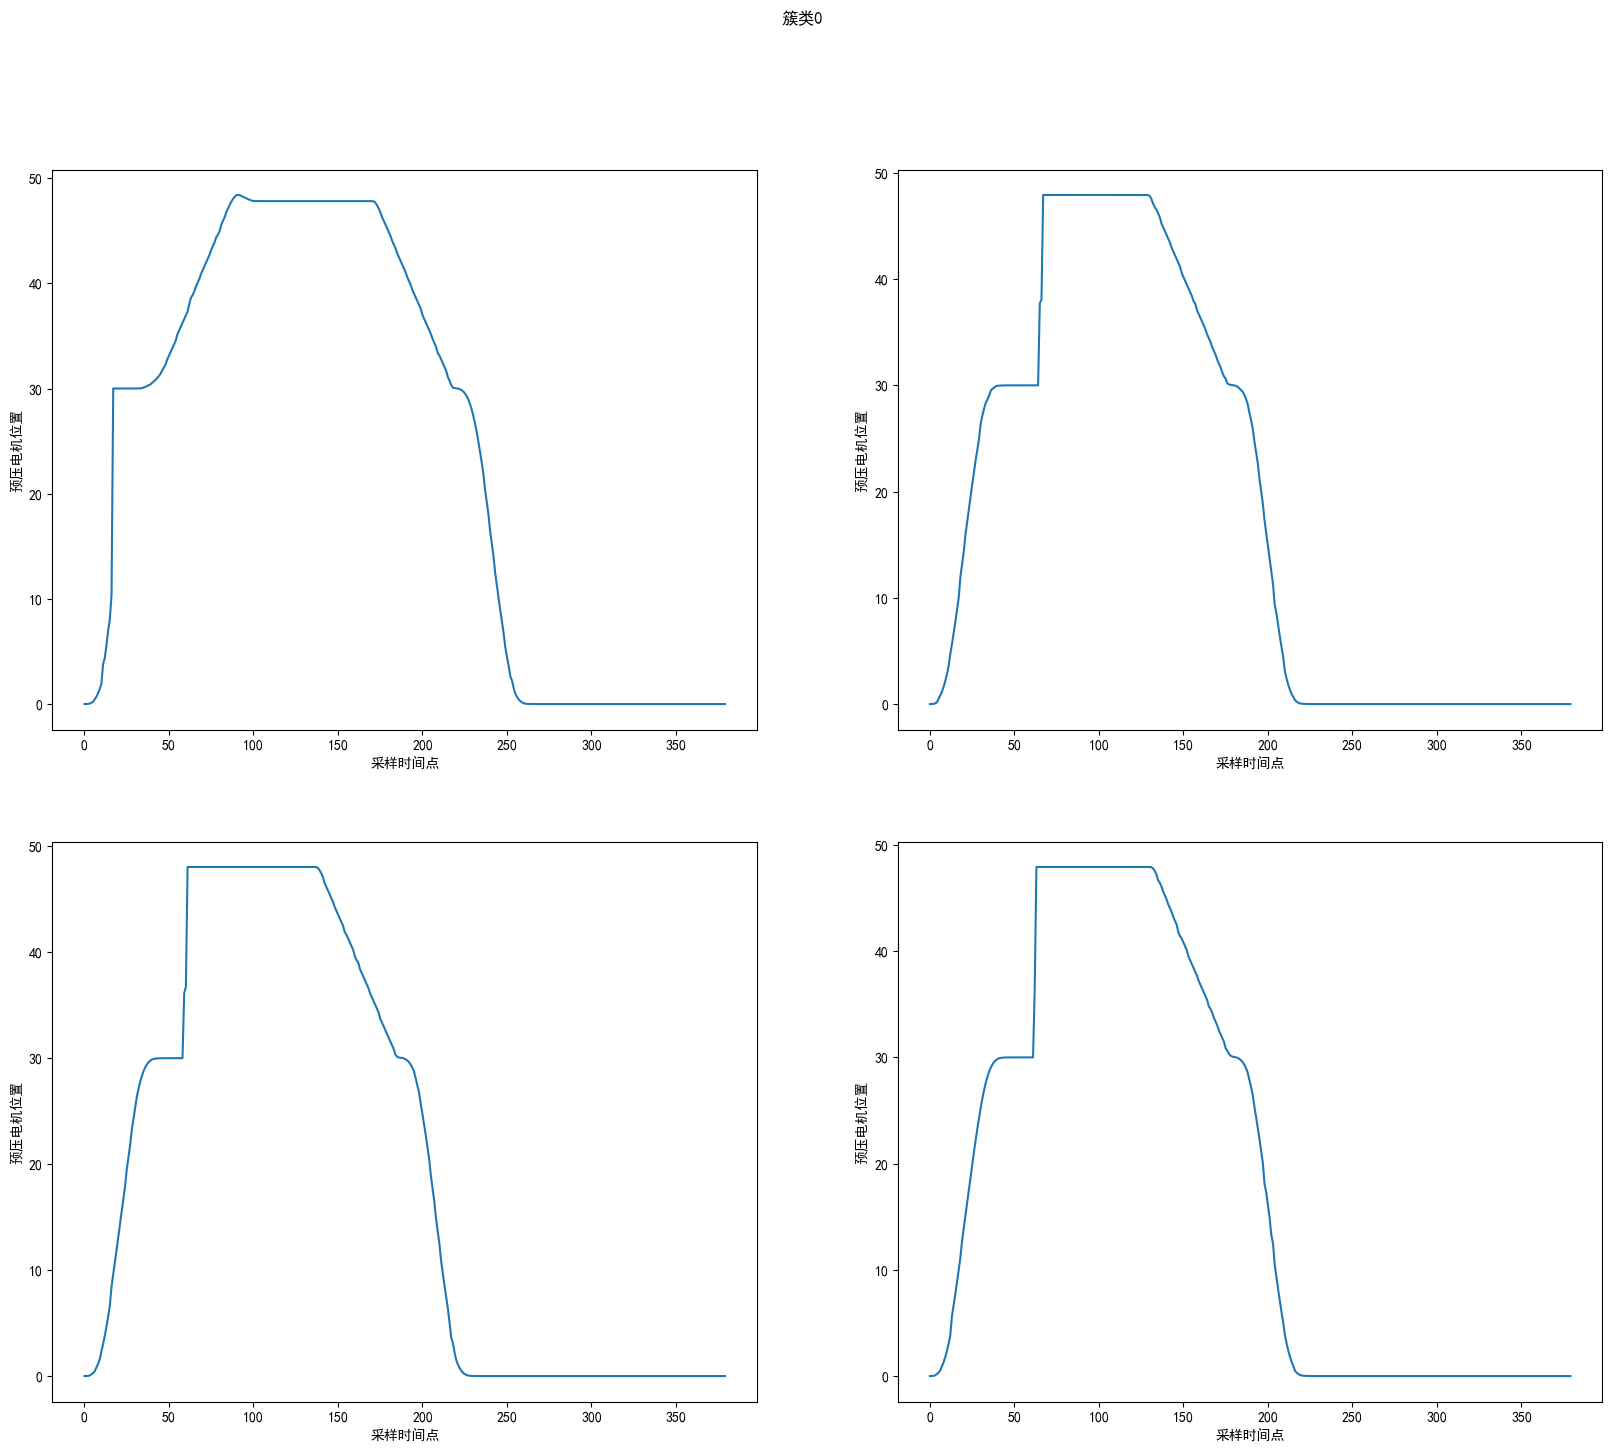

1 [1120, 78, 875, 891]


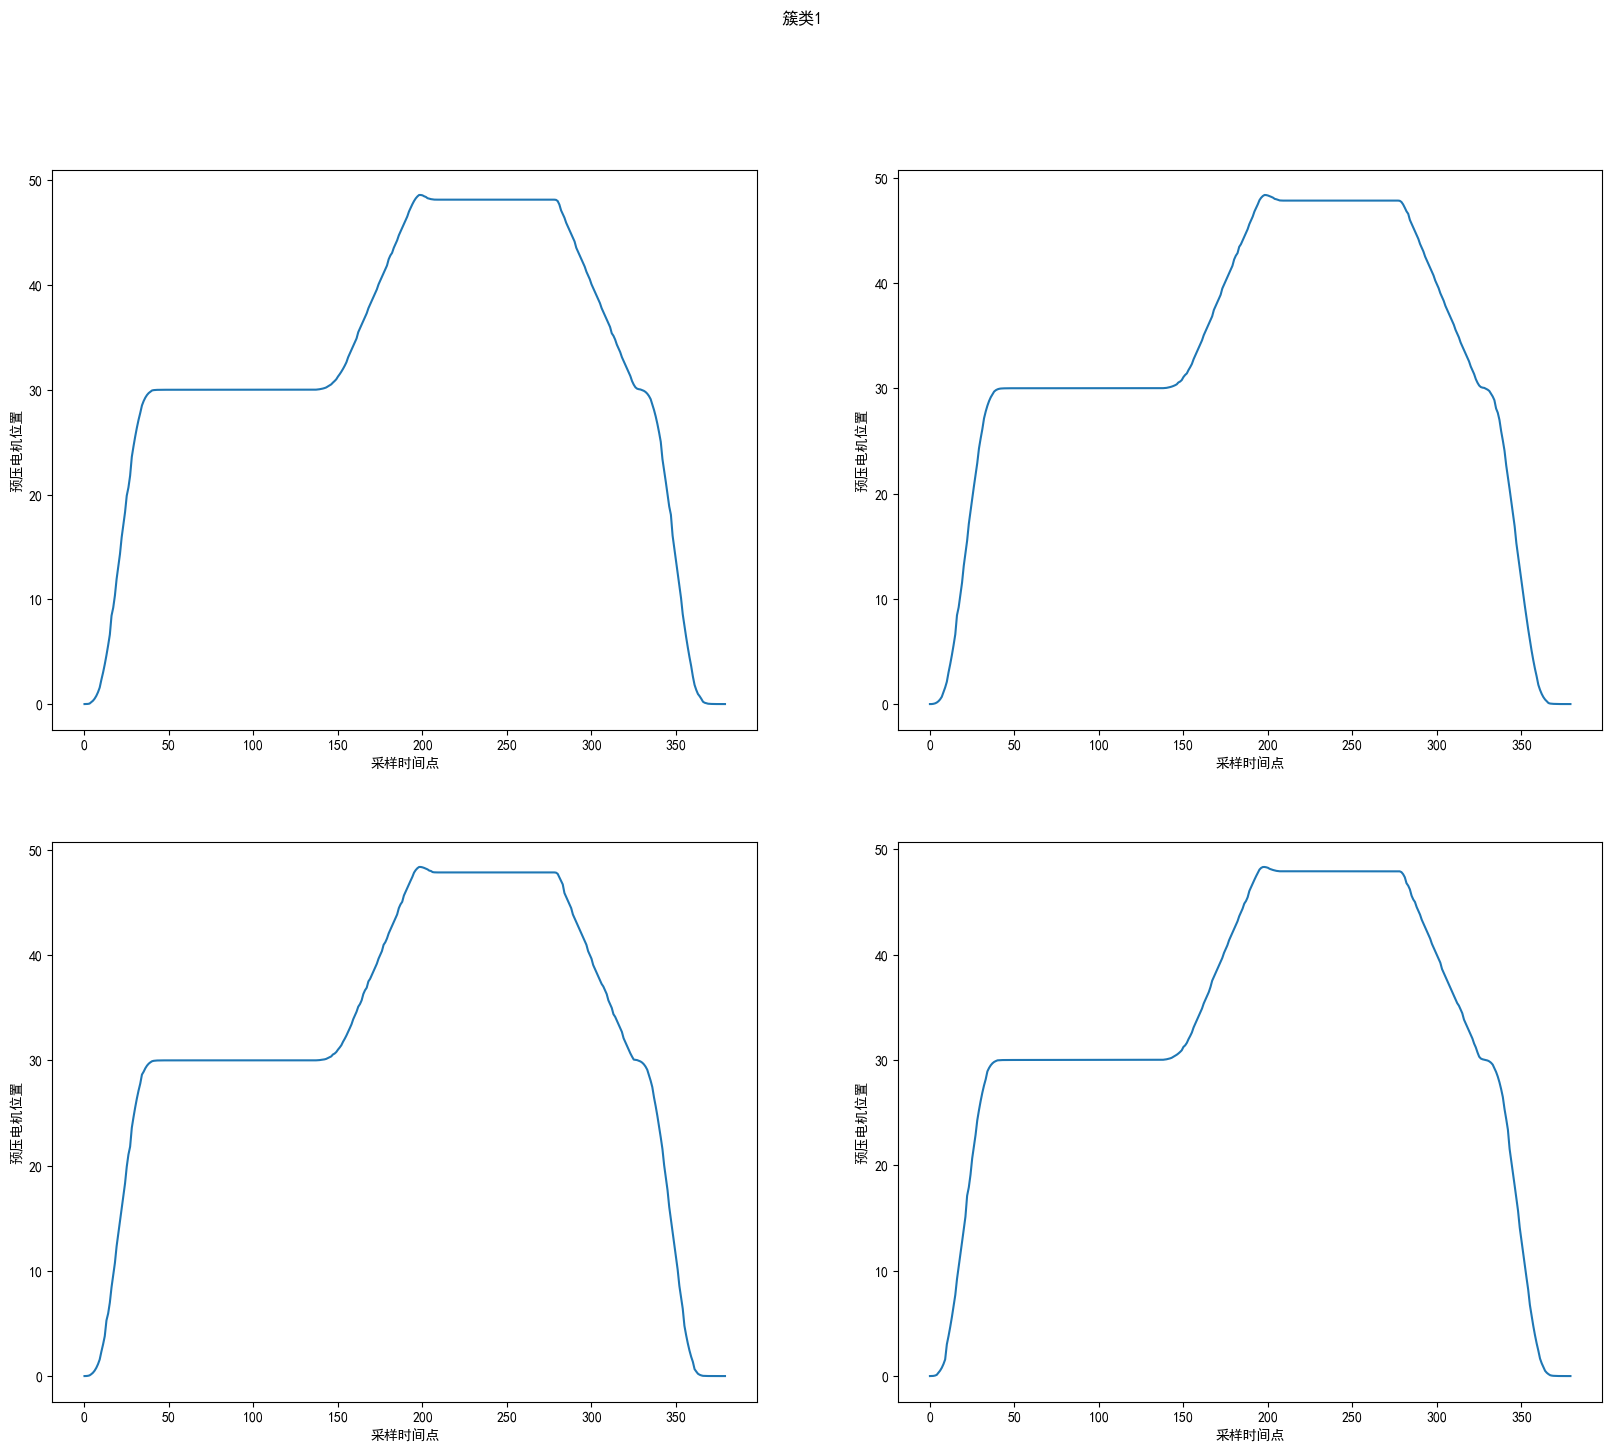

2 [435, 575, 1150, 730]


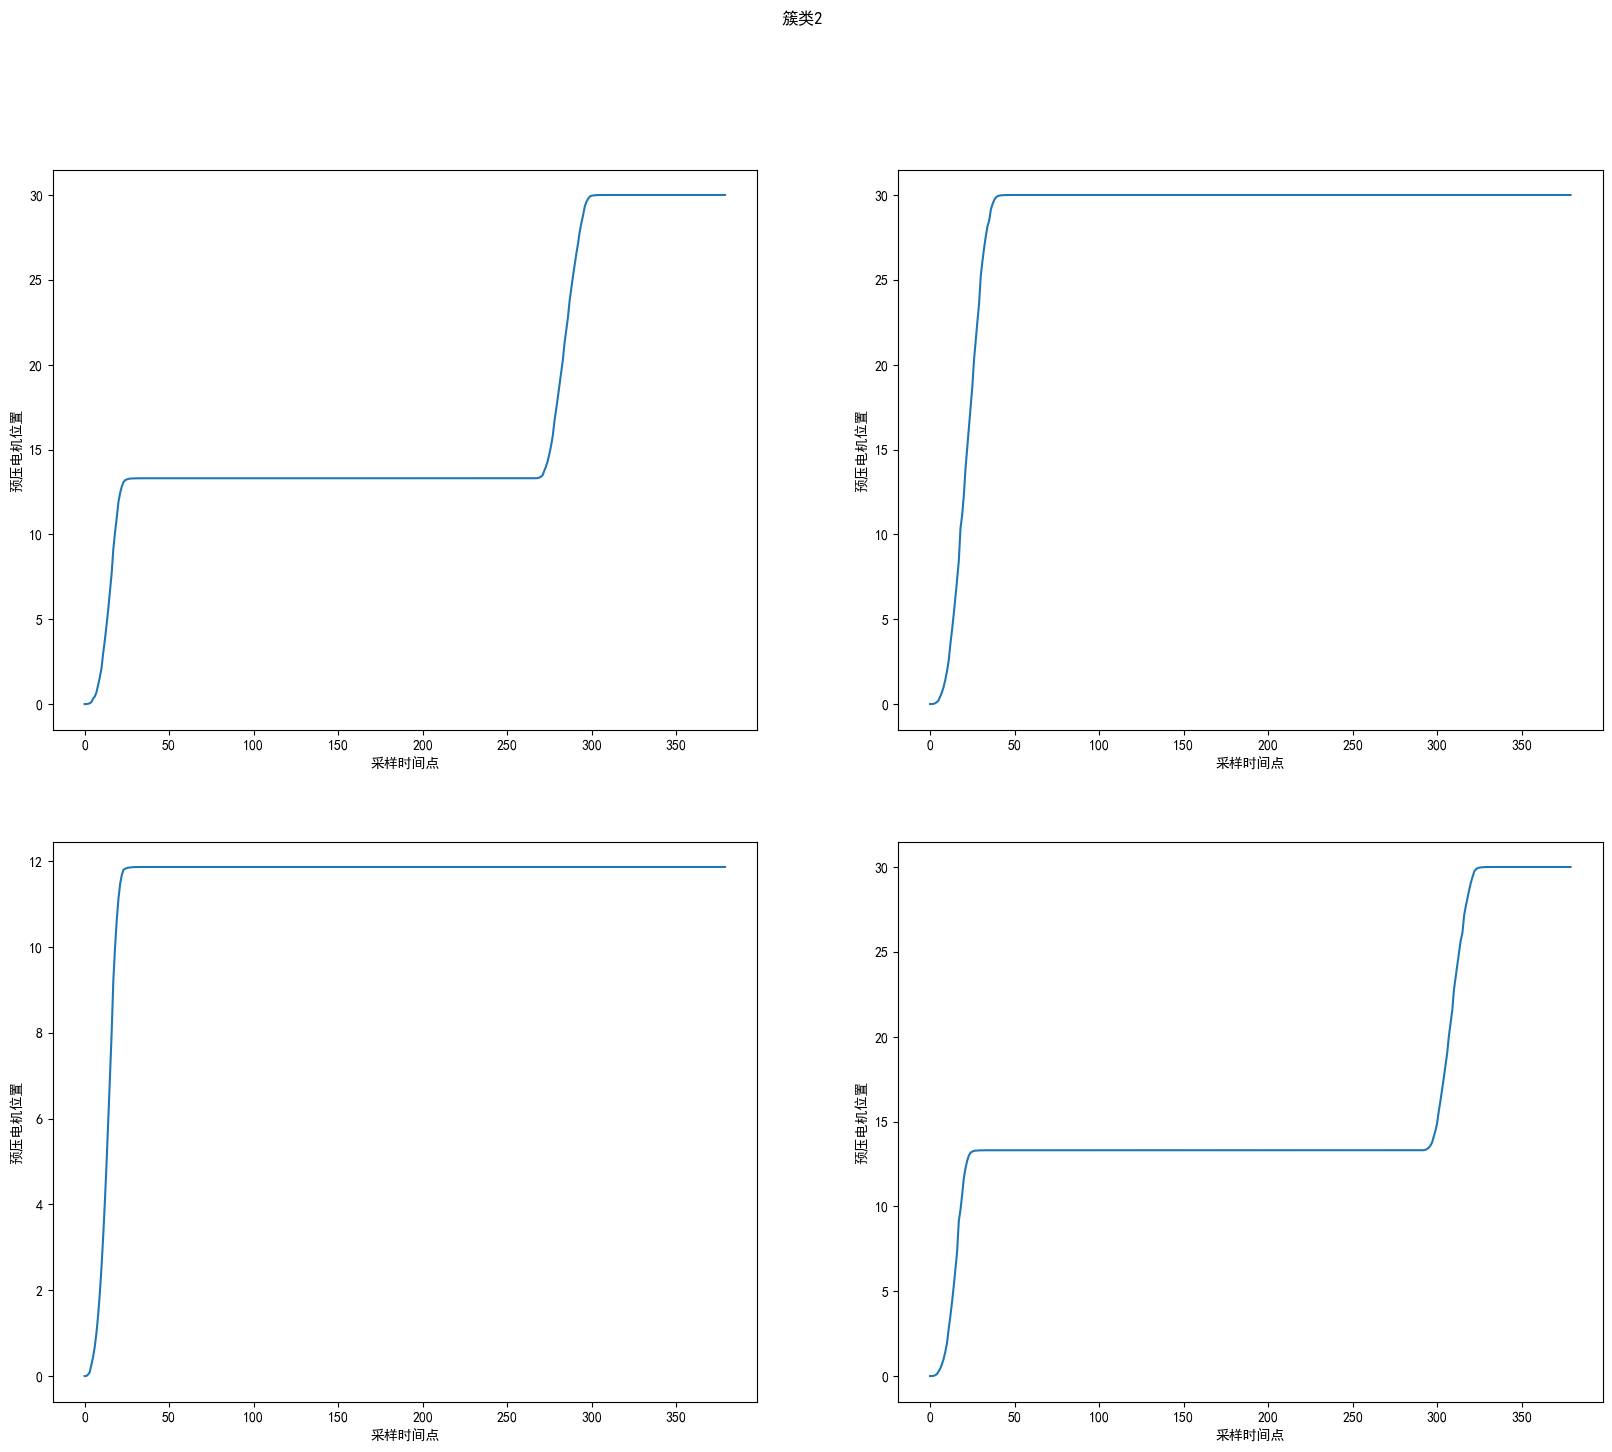

In [57]:
import random
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(20,16)
for i in range(3):
    k = random.sample(df[df['cluster'] == i].code.tolist(),4)
    print(i,k)
    for m,n in enumerate(k):
        plt.subplot(2,2,m+1)
        position = res[n][1]
        plt.plot(range(len(position)),position)
        plt.xlabel('采样时间点')
        plt.ylabel('预压电机位置')
    plt.suptitle('簇类'+str(i))
    plt.show()


In [17]:
df.to_csv('train_data.csv',index=0)

## 实时部分

In [44]:
# 处理实时周期
real_res = get_startpoint(data2)
real_res[1]

[Function: get_startpoint start...]
[Function: get_startpoint finished, spent time: 37.62s]


["'2022-10-24 00:00:53:4351",
 array([ 5.106131e-05,  4.606048e-03,  2.238254e-02,  6.496072e-02,
         1.417387e-01,  2.633598e-01,  4.406353e-01,  6.848635e-01,
         1.006735e+00,  1.574630e+00,  2.119792e+00,  2.772015e+00,
         3.522786e+00,  4.365254e+00,  5.287924e+00,  6.977636e+00,
         8.066133e+00,  9.195556e+00,  1.035576e+01,  1.153628e+01,
         1.272710e+01,  1.432052e+01,  1.551718e+01,  1.671538e+01,
         1.791348e+01,  1.910326e+01,  2.027743e+01,  2.179876e+01,
         2.289439e+01,  2.393611e+01,  2.522615e+01,  2.610475e+01,
         2.689392e+01,  2.779104e+01,  2.834010e+01,  2.878947e+01,
         2.914809e+01,  2.942517e+01,  2.963136e+01,  2.981515e+01,
         2.989864e+01,  2.994733e+01,  2.997218e+01,  2.998377e+01,
         2.999015e+01,  2.999504e+01,  2.999678e+01,  2.999806e+01,
         2.999907e+01,  2.999947e+01,  2.999970e+01,  2.999984e+01,
         2.999992e+01,  2.999998e+01,  3.000002e+01,  3.000004e+01,
         3.000005e

In [45]:
## 处理实时特征
#提取位置/速度/转矩全部的特征信息
real_result = []
for i in range(len(real_res)):
    rest = []
    for j in range(1,4):
        f = Fea_Extra(real_res[i][j])
        temp = f.Both_Fea()
        rest.append(temp)
    real_result.append(list(np.array(rest).flatten()))
# len(result[1])
real_df = pd.DataFrame(real_result)
real_df['code'] = range(len(real_res))
real_df['time'] = [i[0] for i in real_res]
real_df

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,code,time
0,7.560743,13.551462,2.089479,15.502377,22.848201,1.505141,0.681708,2.947698,21.869721,2.050375,...,1.375375,3.252144,0.422913,0.811338,2.630348,12.153506,0.118421,0.042105,0,'2022-10-24 00:00:31:7063
1,31.707685,14.334500,28.306812,34.789574,24.273221,-0.833271,-0.013652,1.395430,1.715008,1.097197,...,1.300768,3.087238,0.421337,0.918614,2.298458,9.771569,0.731579,0.042105,1,'2022-10-24 00:00:53:4351
2,32.324780,13.943299,29.255527,35.196525,24.263429,-0.868171,0.150845,1.378742,1.658726,1.088840,...,1.320791,3.272462,0.403608,0.936337,2.504313,11.134659,0.747368,0.042105,2,'2022-10-24 00:04:46:1370
3,32.100991,14.195142,28.818080,35.091956,24.266280,-0.860730,0.082732,1.383011,1.684101,1.093174,...,1.280431,3.156631,0.405632,0.932693,2.478913,10.996317,0.736842,0.039474,3,'2022-10-24 00:06:36:7301
4,32.368769,13.827394,29.411971,35.191346,24.249922,-0.853661,0.160130,1.378177,1.648985,1.087201,...,1.366737,3.292124,0.415153,0.947740,2.338742,9.843820,0.742105,0.036842,4,'2022-10-24 00:07:55:0657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,31.916337,14.317478,28.561740,34.972894,24.209920,-0.844632,-0.001588,1.384495,1.695268,1.095768,...,1.219870,2.979747,0.409387,0.918142,2.429342,10.931634,0.739474,0.044737,1082,'2022-10-24 23:50:44:4633
1083,23.135949,20.385184,14.183758,30.817759,24.207573,-0.015254,-1.732576,1.571012,3.413416,1.332029,...,1.265036,3.051939,0.414503,0.912891,2.395888,10.652149,0.455263,0.039474,1083,'2022-10-24 23:52:54:5676
1084,31.490346,14.654545,27.822875,34.725098,24.193507,-0.822898,-0.117584,1.393428,1.739106,1.102722,...,1.335705,3.217652,0.415118,0.927526,2.402651,10.355457,0.728947,0.042105,1084,'2022-10-24 23:58:21:0735
1085,32.766570,13.787848,29.895775,35.542264,24.212690,-0.882988,0.191481,1.362475,1.619809,1.084711,...,1.292169,3.213863,0.402061,0.942367,2.518883,11.219232,0.750000,0.042105,1085,'2022-10-24 23:59:02:5842


In [43]:
real_df.iloc[:,:75].to_csv("real_df.csv",index=0)

In [46]:
## 加载模型并加载进行预测
from model_lgb import *
real_df = pd.read_csv("real_df.csv")
# print(real_df)
real_pred = model_load(real_df)
real_pred[:4]

load model_lgb successfully
predict successfully


[0, 1, 1, 1]

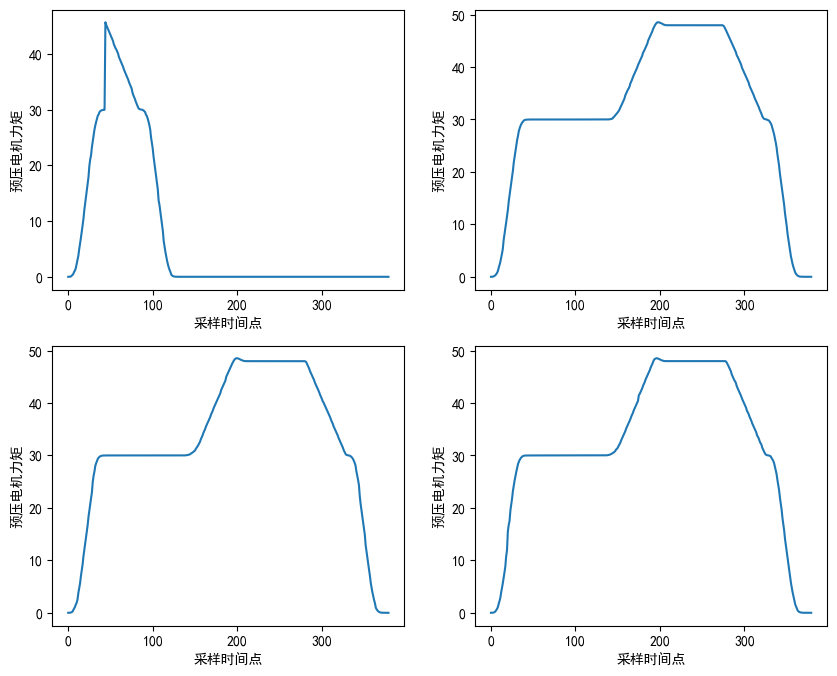

In [47]:
##结果验证
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(10,8)
for i in range(4):
    plt.subplot(2,2,i+1)
    position = real_res[i][1]
    plt.plot(range(len(position)),position)
    plt.xlabel('采样时间点')
    plt.ylabel('预压电机力矩')
#     plt.suptitle('簇类'+str(i))
#     plt.show()

# plt.plot(range(len(test_data)),test_data)